### Decision Treeを日本語で表示したりpngで保存する方法

Jupyter notebook on Anaconda, Windows10 で確認

In [ ]:
conda install graphviz

#### site-packages/sklearn/tree/export.py を書き換える



font を日本語フォント名　IPAexGothic　に書き換える

不等号≤を２本線不等号に書き換える

#### Matplotlibで日本語を表示できる設定

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname='C:\Windows\Fonts\ipaexg.ttf')
mpl.rcParams["font.family"]="IPAexGothic"

#### Decision Treeを作る

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data
y=iris.target

In [12]:
import numpy as np
np.random.seed(1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=4,
                                  class_weight=None)
#                                  class_weight='balanced')
clf.fit(x,y)
clf.score(x,y)

0.9733333333333334

#### dotを保存せずにpngに書き出す。日本語

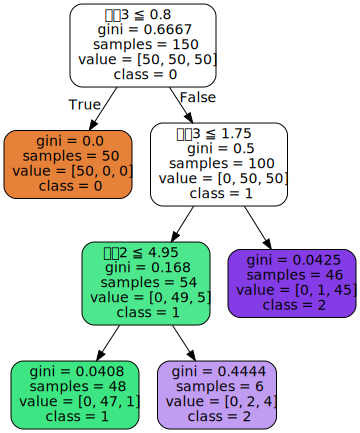

In [19]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, #'tree.dot', 
                         feature_names=['特徴0','特徴1','特徴2','特徴3'],
                         class_names=['0','1','2'],
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data, encoding='utf-8', format='png')
png_bytes = graph.pipe(format='png')
with open('tree.png','wb') as f:
    f.write(png_bytes)
graph